# **Day 1 Task**: _Airbnb Price Prediction_

**Objective**: Analyze the factors affecting Airbnb pricing and build a regression model to predict listing prices.

In [1]:
# Load and inspect dataset
import pandas as pd
df= pd.read_csv(r'D:\Projects\Daily Projects\AirBnB (16-023-25)\Dataset\listings.csv')
# shows top 3 rows
print(df.head(3))

#tells the info of the dataset
print(df.info())

#Check for null values
print(df.isnull().sum())

# Check basic statistics
print(df.describe())

        id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   

                                         description exp

In [2]:
# Handling missing values

#Let's fill the values for numeric columns with the median
numeric_cols = ['bedrooms', 'bathrooms', 'reviews_per_month']
df[numeric_cols]=df[numeric_cols].fillna(df[numeric_cols].median())

#Fill in the values for categorical columns with the mode
categorical_cols = ['neighbourhood', 'room_type']
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Drop rows with missing 'price' as it's our target variable
df = df.dropna(subset=['price'])

In [3]:
#Extracting relevant features

# Select relevant features
features = ['room_type', 'accommodates', 'bedrooms', 'bathrooms', 'neighbourhood', 'reviews_per_month', 'price']
df = df[features]

# Convert 'price' to numeric (remove '$' and commas)
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)

In [4]:
# Encode categorical Variables

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['room_type', 'neighbourhood'], drop_first=True)

## EDA(Exploratory Data Anaslysis)

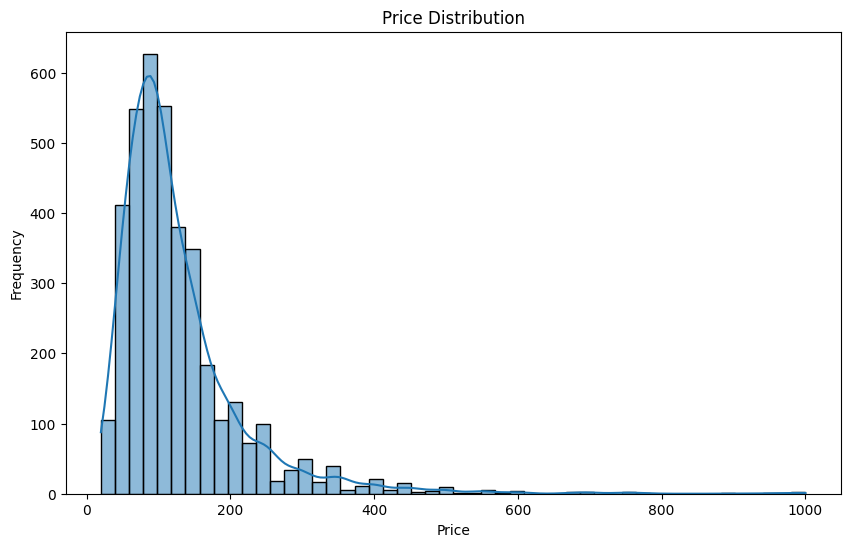

In [5]:
# Visualizing price distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

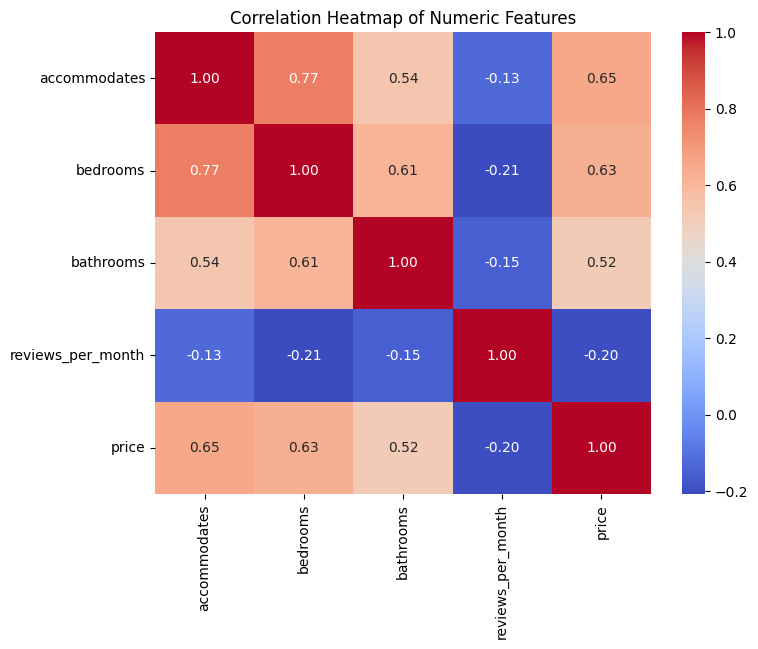

In [6]:
# Correlation heatmap
numeric_features = ['accommodates', 'bedrooms', 'bathrooms', 'reviews_per_month', 'price']
corr_matrix = df[numeric_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

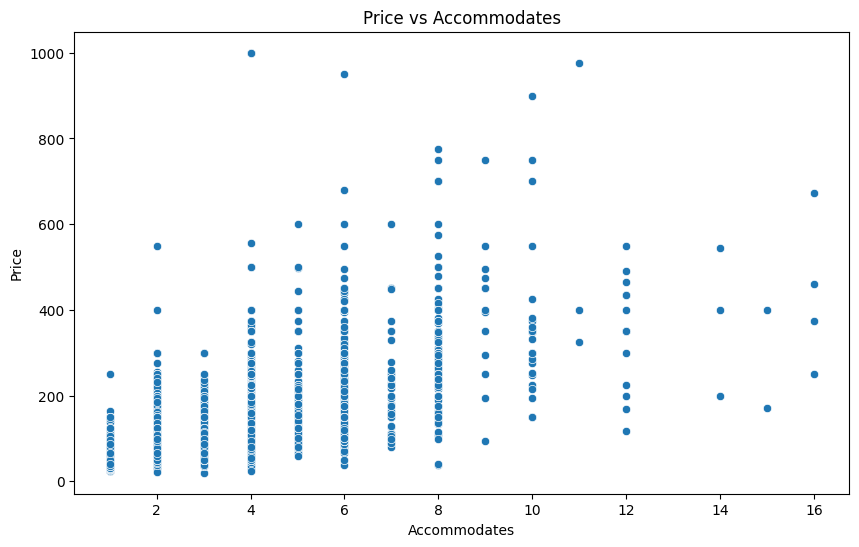

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='accommodates', y='price', data=df)
plt.title('Price vs Accommodates')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.show()

**PAIRPLOT**

1. Feature: `accommodates` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    1.1. Diagonal Cell: Shows the distribution of the number of people a listing can accommodate.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The histogram will peak in that range if most listings accommodate 2-4 people.<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    1.2 Scatterplot (Price vs Accommodates):<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; If the points trend upward, it means listings that accommodate more people tend to be more expensive.<br>
<br>
2. Feature: `bedrooms`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    2.1. Diagonal Cell: Shows the distribution of the number of bedrooms.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; If most listings have 1-2 bedrooms, the histogram will reflect that.<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    2.2. Scatterplot (Price vs Bedrooms):<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; If the points trend upward, it means listings with more bedrooms tend to be more expensive.<br>
<br>
... _so on_

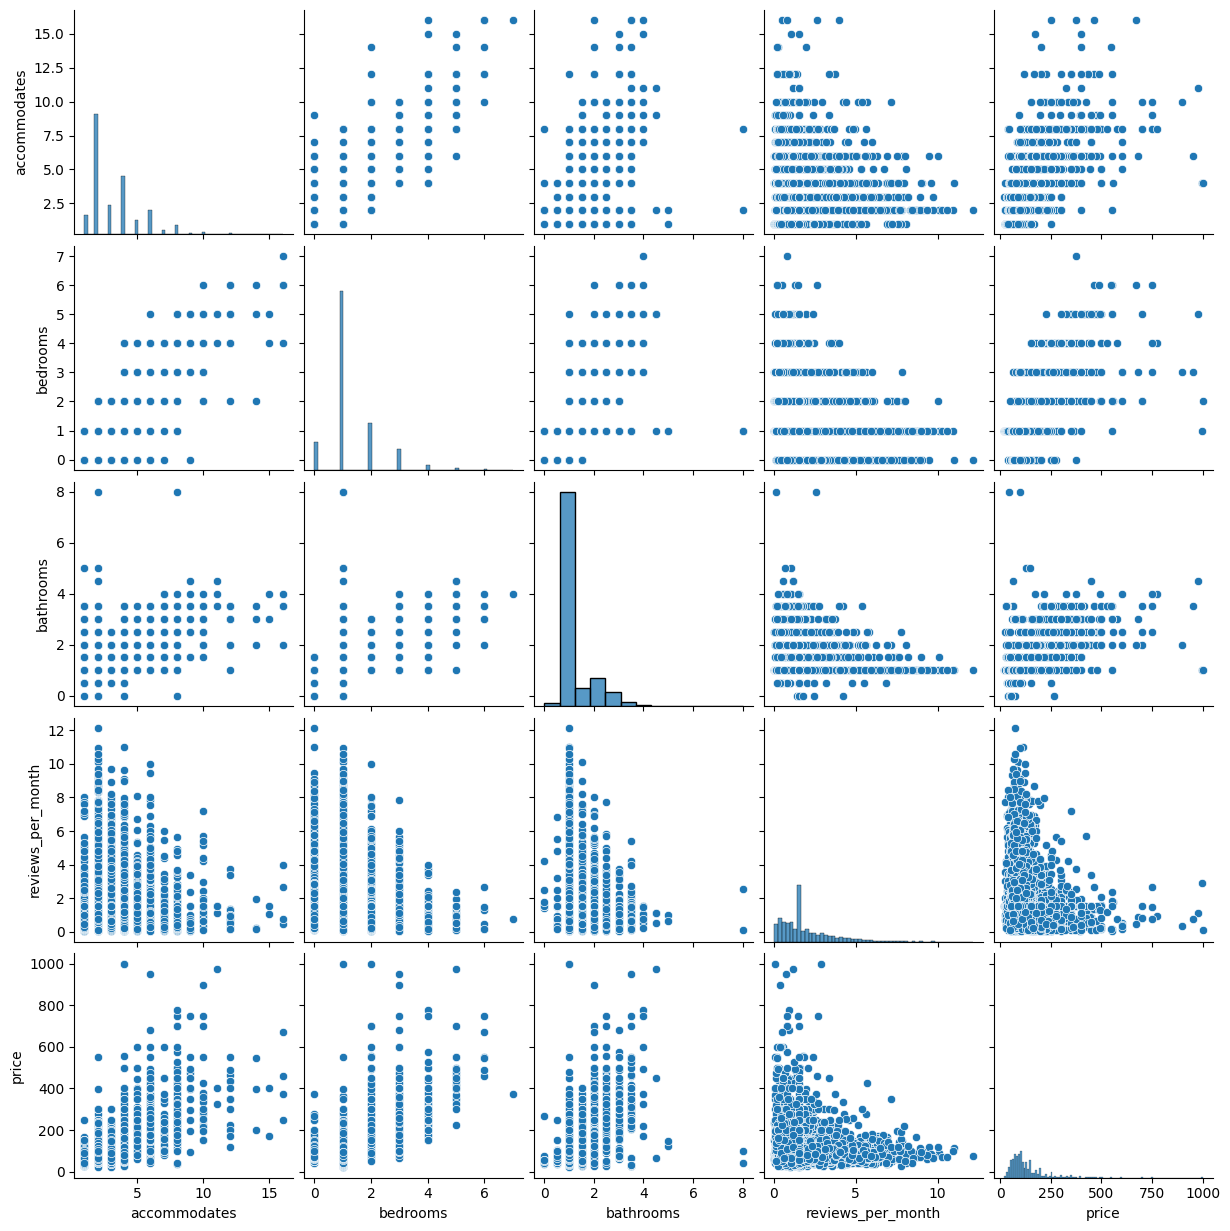

In [8]:
numeric_features = ['accommodates', 'bedrooms', 'bathrooms', 'reviews_per_month', 'price']
sns.pairplot(df[numeric_features])
plt.show()

## Modeling

In [9]:
# Split train & test set

from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#train a regression model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [11]:
# Evaluate the model

# Calculate RMSE and R²
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R²: {r2}')

RMSE: 3527.1742324476904
R²: 0.5654211777836048


In [12]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", -grid_search.best_score_)

# Use the best model from GridSearchCV
best_model = grid_search.best_estimator_


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best CV Score: 35.31548445768588


In [13]:
# Model Comparison
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Train Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions and evaluation
rf_pred = best_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

# Compare MAE of both models
rf_mae = mean_absolute_error(y_test, rf_pred)
gb_mae = mean_absolute_error(y_test, gb_pred)

print("Random Forest MAE:", rf_mae)
print("Gradient Boosting MAE:", gb_mae)


Random Forest MAE: 35.27284843624934
Gradient Boosting MAE: 35.1816597110947
